In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, auc, make_scorer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import warnings
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("shop.csv")

print("Размер данных")
print(df.shape)
warnings.filterwarnings('ignore')
print("Информация")
print(df.info())

Размер данных
(3900, 16)
Информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Previous Purchases      3900 non-null   int64  
 14  Paym

In [31]:
print("Строки")
print(df.head(10))

Строки
   Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse     Clothing                     53   
1            2   19   Male        Sweater     Clothing                     64   
2            3   50   Male          Jeans     Clothing                     73   
3            4   21   Male        Sandals     Footwear                     90   
4            5   45   Male         Blouse     Clothing                     49   
5            6   46   Male       Sneakers     Footwear                     20   
6            7   63   Male          Shirt     Clothing                     85   
7            8   27   Male         Shorts     Clothing                     34   
8            9   26   Male           Coat    Outerwear                     97   
9           10   57   Male        Handbag  Accessories                     31   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L 

In [32]:
print("Пропущенные значения по столбцам:")
print(df.isna().sum())

Пропущенные значения по столбцам:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Discount Applied          0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [33]:
num_features = df.select_dtypes(include=['int64','float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

print("Числовые признаки:", num_features)
print("Категориальные признаки:", cat_features)

df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

Числовые признаки: Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')
Категориальные признаки: Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Discount Applied', 'Payment Method',
       'Frequency of Purchases'],
      dtype='object')


Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64


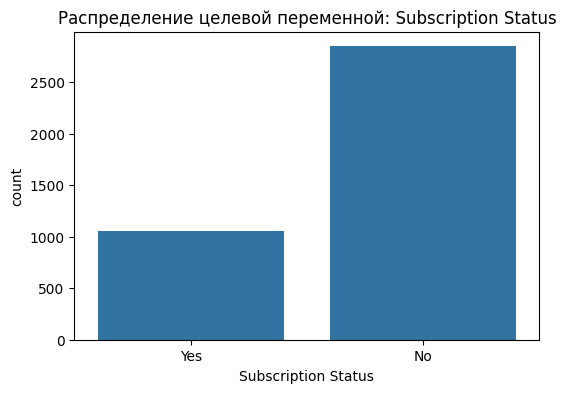

Здесь видно дисбаланс классов с соотношением 27%/73%, это может приводить к смещению модели в сторону большинства.


In [34]:
y = df['Subscription Status']

print(y.value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Распределение целевой переменной: Subscription Status')
plt.show()
print("Здесь видно дисбаланс классов с соотношением 27%/73%, это может приводить к смещению модели в сторону большинства.")

In [35]:
df_encoded = pd.get_dummies(df.drop('Customer ID', axis=1), drop_first=True)

y = df_encoded['Subscription Status_Yes']
X = df_encoded.drop(['Subscription Status_Yes'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_nb = np.abs(X_train) 
X_test_nb  = np.abs(X_test)

print(f"\nРазделение данных:")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Соотношение train/test: {X_train.shape[0]/X.shape[0]:.1%}/{X_test.shape[0]/X.shape[0]:.1%}")


Разделение данных:
Обучающая выборка: (2730, 123)
Тестовая выборка: (1170, 123)
Соотношение train/test: 70.0%/30.0%


In [36]:
from sklearn.metrics import accuracy_score

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))

# MultinomialNB 
mnb = MultinomialNB()
mnb.fit(np.abs(X_train), y_train)
y_pred_mnb = mnb.predict(np.abs(X_test))
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))

# ComplementNB 
cnb = ComplementNB()
cnb.fit(np.abs(X_train), y_train)
y_pred_cnb = cnb.predict(np.abs(X_test))
print("ComplementNB Accuracy:", accuracy_score(y_test, y_pred_cnb))

# BernoulliNB
bnb = BernoulliNB()
bnb.fit((X_train > X_train.mean()).astype(int), y_train)
y_pred_bnb = bnb.predict((X_test > X_train.mean()).astype(int))
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred_lda = lda.predict(X_test_scaled)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))

# Support Vector Machine
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("")
print("По метрике Accuracy лучшими стали LDA и BernoulliNB — обе модели показывают устойчиво высокое")
print("качество и хорошо обобщают данные. GaussianNB и SVM также демонстрируют близкие результаты,")
print("подтверждая свою надёжность на данном датасете, тогда как kNN заметно уступает остальным и работает хуже всех.")
print("")

GaussianNB Accuracy: 0.8239316239316239
MultinomialNB Accuracy: 0.7743589743589744
ComplementNB Accuracy: 0.7923076923076923
BernoulliNB Accuracy: 0.8247863247863247
Decision Tree Accuracy: 0.7700854700854701
LDA Accuracy: 0.8324786324786325
SVM Accuracy: 0.8188034188034188
kNN Accuracy: 0.6974358974358974

По метрике Accuracy лучшими стали LDA и BernoulliNB — обе модели показывают устойчиво высокое
качество и хорошо обобщают данные. GaussianNB и SVM также демонстрируют близкие результаты,
подтверждая свою надёжность на данном датасете, тогда как kNN заметно уступает остальным и работает хуже всех.



In [37]:
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """Вычисляет все метрики для модели"""
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0),
        'AUC-ROC': roc_auc_score(y_true, y_pred_proba)
    }

all_metrics = {}

# GaussianNB
y_pred_gnb = gnb.predict(X_test_scaled)
y_pred_proba_gnb = gnb.predict_proba(X_test_scaled)[:, 1]
metrics_gnb = evaluate_model(y_test, y_pred_gnb, y_pred_proba_gnb, "GaussianNB")
all_metrics['GaussianNB'] = metrics_gnb

# MultinomialNB
y_pred_mnb = mnb.predict(np.abs(X_test))
y_pred_proba_mnb = mnb.predict_proba(np.abs(X_test))[:, 1]
metrics_mnb = evaluate_model(y_test, y_pred_mnb, y_pred_proba_mnb, "MultinomialNB")
all_metrics['MultinomialNB'] = metrics_mnb

# ComplementNB
y_pred_cnb = cnb.predict(np.abs(X_test))
y_pred_proba_cnb = cnb.predict_proba(np.abs(X_test))[:, 1]
metrics_cnb = evaluate_model(y_test, y_pred_cnb, y_pred_proba_cnb, "ComplementNB")
all_metrics['ComplementNB'] = metrics_cnb

# BernoulliNB
X_test_bnb = (X_test > X_train.mean()).astype(int)
y_pred_bnb = bnb.predict(X_test_bnb)
y_pred_proba_bnb = bnb.predict_proba(X_test_bnb)[:, 1]
metrics_bnb = evaluate_model(y_test, y_pred_bnb, y_pred_proba_bnb, "BernoulliNB")
all_metrics['BernoulliNB'] = metrics_bnb

# Decision Tree
y_pred_dt = dt.predict(X_test_scaled)
y_pred_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]
metrics_dt = evaluate_model(y_test, y_pred_dt, y_pred_proba_dt, "DecisionTree")
all_metrics['DecisionTree'] = metrics_dt

# LDA
y_pred_lda = lda.predict(X_test_scaled)
y_pred_proba_lda = lda.predict_proba(X_test_scaled)[:, 1]
metrics_lda = evaluate_model(y_test, y_pred_lda, y_pred_proba_lda, "LDA")
all_metrics['LDA'] = metrics_lda

# SVM
y_pred_svm = svm.predict(X_test_scaled)
decision_svm = svm.decision_function(X_test_scaled)
y_pred_proba_svm = 1 / (1 + np.exp(-decision_svm)) 
metrics_svm = evaluate_model(y_test, y_pred_svm, y_pred_proba_svm, "SVM")
all_metrics['SVM'] = metrics_svm

# kNN
y_pred_knn = knn.predict(X_test_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]
metrics_knn = evaluate_model(y_test, y_pred_knn, y_pred_proba_knn, "KNN")
all_metrics['KNN'] = metrics_knn

metrics_df = pd.DataFrame(all_metrics).T
metrics_df = metrics_df.round(4)

df_results = metrics_df.copy()

print("\nСводная таблица метрик:")
print("\n")
print(metrics_df)

sorted_by_f1 = metrics_df.sort_values('F1-Score', ascending=False)
print("\nМодели по f1-score:")
print("\n")
for i, (model, row) in enumerate(sorted_by_f1.iterrows(), 1):
    print(f"{i:2}. {model:15} | F1-Score: {row['F1-Score']:.4f} | "
          f"Precision: {row['Precision']:.4f} | Recall: {row['Recall']:.4f}")


Сводная таблица метрик:


               Accuracy  Precision  Recall  F1-Score  AUC-ROC
GaussianNB       0.8239     0.6255  0.9643    0.7588   0.8775
MultinomialNB    0.7744     0.6622  0.4375    0.5269   0.8725
ComplementNB     0.7923     0.5863  0.9405    0.7223   0.8725
BernoulliNB      0.8248     0.6252  0.9732    0.7614   0.8804
DecisionTree     0.7701     0.6037  0.5804    0.5918   0.7134
LDA              0.8325     0.6326  0.9940    0.7731   0.8731
SVM              0.8188     0.6265  0.9137    0.7433   0.8759
KNN              0.6974     0.4328  0.1726    0.2468   0.6080

Модели по f1-score:


 1. LDA             | F1-Score: 0.7731 | Precision: 0.6326 | Recall: 0.9940
 2. BernoulliNB     | F1-Score: 0.7614 | Precision: 0.6252 | Recall: 0.9732
 3. GaussianNB      | F1-Score: 0.7588 | Precision: 0.6255 | Recall: 0.9643
 4. SVM             | F1-Score: 0.7433 | Precision: 0.6265 | Recall: 0.9137
 5. ComplementNB    | F1-Score: 0.7223 | Precision: 0.5863 | Recall: 0.9405
 6. Decision

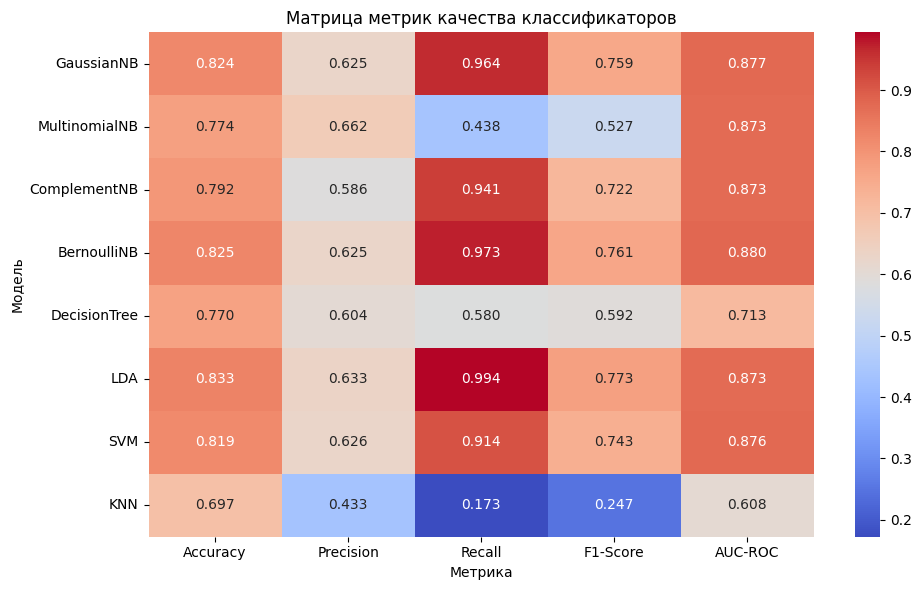

По матрице видно, что что LDA демонстрирует наилучший баланс качества,
обеспечивая самый высокий F1-score и максимальную полноту. Байесовские модели (BernoulliNB,
GaussianNB) также показывают высокую полноту, но немного уступают в F1. kNN и DecisionTree
работают заметно хуже, особенно kNN — модель явно не подходит для данной задачи.


In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_results, annot=True, fmt=".3f", cmap="coolwarm")
plt.title("Матрица метрик качества классификаторов")
plt.xlabel("Метрика")
plt.ylabel("Модель")
plt.tight_layout()
plt.show()
print("По матрице видно, что что LDA демонстрирует наилучший баланс качества,")
print("обеспечивая самый высокий F1-score и максимальную полноту. Байесовские модели (BernoulliNB,")
print("GaussianNB) также показывают высокую полноту, но немного уступают в F1. kNN и DecisionTree")
print("работают заметно хуже, особенно kNN — модель явно не подходит для данной задачи.")

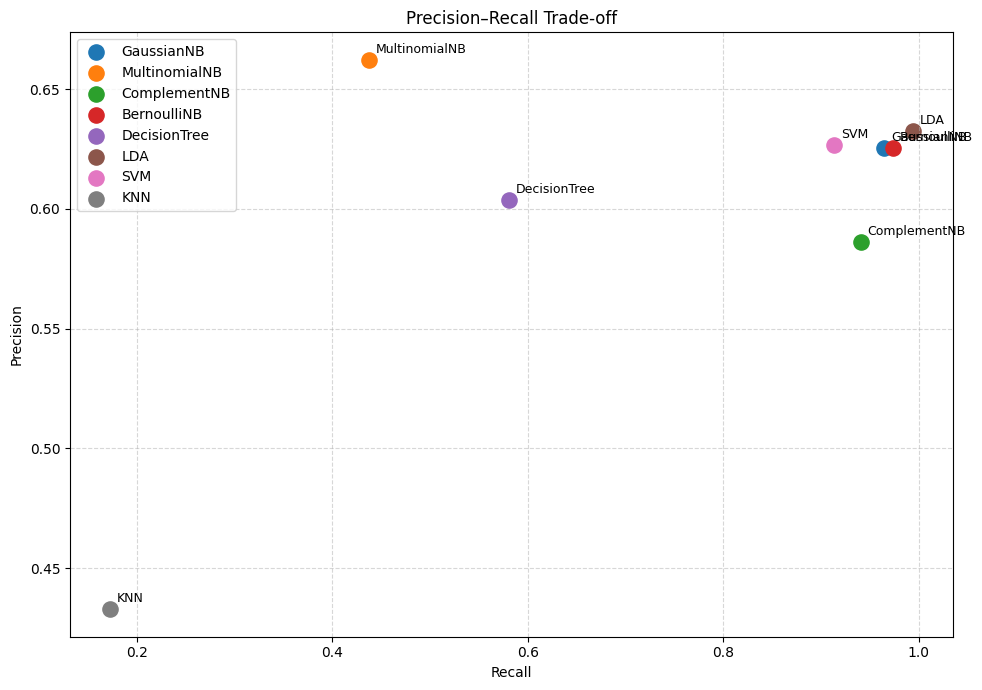

По Precision Recall видно, что большинство моделей тяготеют в сторону высокой полноты (Recall) ценой снижения точности (Precision). Особенно это проявляется у LDA,
BernoulliNB и GaussianNB — они находят почти все положительные объекты, но допускают больше ложных срабатываний.
Модели вроде MultinomialNB ведут себя противоположно: повышают точность,
но упускают значительную часть положительных примеров, что делает их менее сбалансированными.


In [39]:
plt.figure(figsize=(10, 7))

# Используем уже вычисленные метрики из DataFrame
for model_name in metrics_df.index:
    prec = metrics_df.loc[model_name, 'Precision']
    rec = metrics_df.loc[model_name, 'Recall']
    
    plt.scatter(rec, prec, s=120, label=model_name)
    plt.annotate(model_name, (rec, prec), xytext=(5, 5), 
                 textcoords='offset points', fontsize=9)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Trade-off")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
print("По Precision Recall видно, что большинство моделей тяготеют в сторону высокой полноты (Recall) ценой снижения точности (Precision). Особенно это проявляется у LDA,")
print("BernoulliNB и GaussianNB — они находят почти все положительные объекты, но допускают больше ложных срабатываний.")
print("Модели вроде MultinomialNB ведут себя противоположно: повышают точность,")
print("но упускают значительную часть положительных примеров, что делает их менее сбалансированными.")

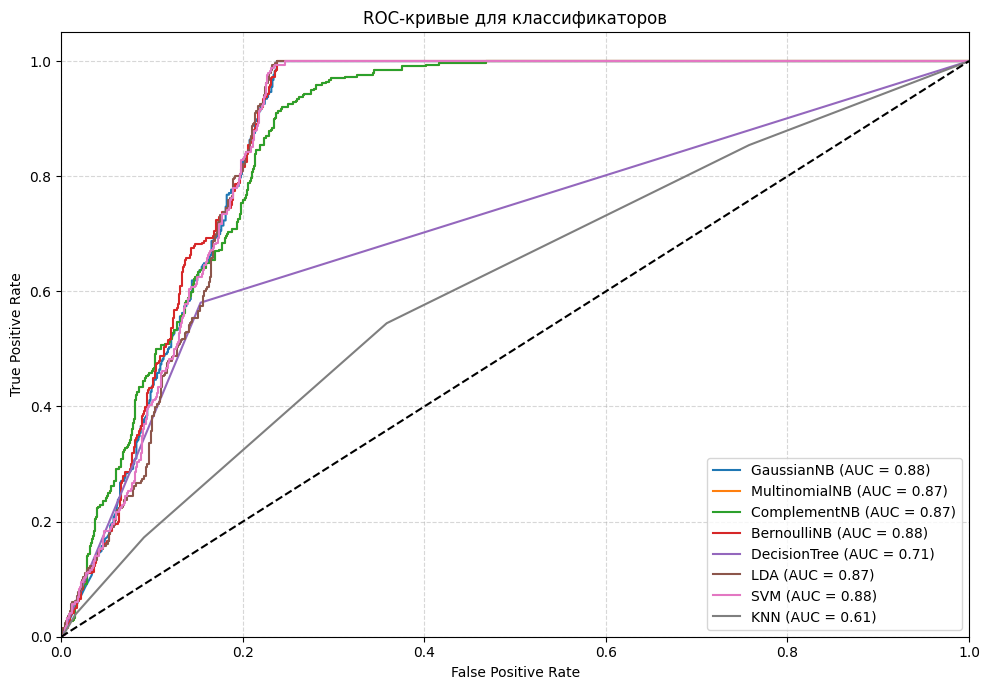

ROC-кривые показывают, как модели различают классы при разных порогах, и по ним видно, что
лучшие результаты демонстрируют LDA, BernoulliNB и GaussianNB — их AUC-ROC находится около 0.88.
Модели вроде kNN и DecisionTree имеют заметно меньшую площадь под кривой, что означает слабую
способность отделять классы. Таким образом, по ROC-анализу лидируют те же модели, что и по F1-score.


In [40]:

plt.figure(figsize=(10, 7))

probabilities_map = {
    'GaussianNB': y_pred_proba_gnb,
    'MultinomialNB': y_pred_proba_mnb,
    'ComplementNB': y_pred_proba_cnb,
    'BernoulliNB': y_pred_proba_bnb,
    'DecisionTree': y_pred_proba_dt,
    'LDA': y_pred_proba_lda,
    'SVM': y_pred_proba_svm,
    'KNN': y_pred_proba_knn
}

for model_name in metrics_df.index:
    y_prob = probabilities_map[model_name]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для классификаторов')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print("ROC-кривые показывают, как модели различают классы при разных порогах, и по ним видно, что")
print("лучшие результаты демонстрируют LDA, BernoulliNB и GaussianNB — их AUC-ROC находится около 0.88.")
print("Модели вроде kNN и DecisionTree имеют заметно меньшую площадь под кривой, что означает слабую")
print("способность отделять классы. Таким образом, по ROC-анализу лидируют те же модели, что и по F1-score.")



Лучшая модель по F1-score: LDA




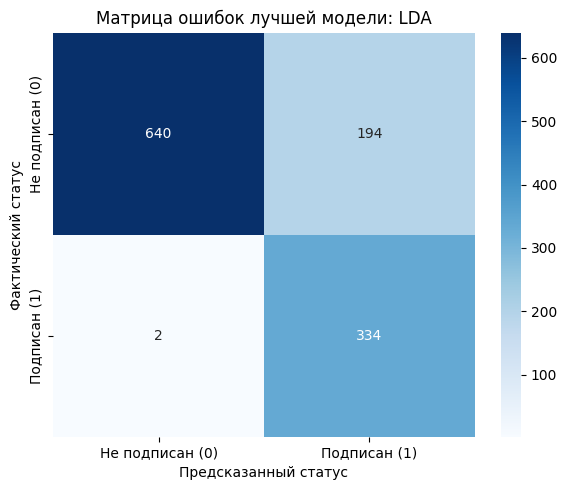


Classification Report (LDA):

                 precision    recall  f1-score   support

Не подписан (0)       1.00      0.77      0.87       834
   Подписан (1)       0.63      0.99      0.77       336

       accuracy                           0.83      1170
      macro avg       0.81      0.88      0.82      1170
   weighted avg       0.89      0.83      0.84      1170


Анализ порогов классификации (LDA):

Порог 0.3 → Precision=0.628, Recall=1.000, F1=0.772
Порог 0.4 → Precision=0.629, Recall=0.997, F1=0.771
Порог 0.5 → Precision=0.633, Recall=0.994, F1=0.773
Порог 0.6 → Precision=0.632, Recall=0.955, F1=0.761
Порог 0.7 → Precision=0.628, Recall=0.878, F1=0.732


In [41]:
sorted_by_f1 = df_results.sort_values("F1-Score", ascending=False)
best_model_name = sorted_by_f1.index[0]

print("\n")
print(f"Лучшая модель по F1-score: {best_model_name}")
print("\n")

predictions_map = {
    "GaussianNB": (y_pred_gnb, y_pred_proba_gnb),
    "MultinomialNB": (y_pred_mnb, y_pred_proba_mnb),
    "ComplementNB": (y_pred_cnb, y_pred_proba_cnb),
    "BernoulliNB": (y_pred_bnb, y_pred_proba_bnb),
    "DecisionTree": (y_pred_dt, y_pred_proba_dt),
    "LDA": (y_pred_lda, y_pred_proba_lda),
    "SVM": (y_pred_svm, y_pred_proba_svm),
    "KNN": (y_pred_knn, y_pred_proba_knn)
}

best_pred, best_proba = predictions_map[best_model_name]

cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Не подписан (0)', 'Подписан (1)'],
            yticklabels=['Не подписан (0)', 'Подписан (1)'])
plt.title(f'Матрица ошибок лучшей модели: {best_model_name}')
plt.ylabel('Фактический статус')
plt.xlabel('Предсказанный статус')
plt.tight_layout()
plt.show()

print(f"\nClassification Report ({best_model_name}):\n")
print(classification_report(y_test, best_pred,
                            target_names=['Не подписан (0)', 'Подписан (1)']))

print(f"\nАнализ порогов классификации ({best_model_name}):\n")
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for t in thresholds:
    y_thr = (best_proba > t).astype(int)
    p = precision_score(y_test, y_thr, zero_division=0)
    r = recall_score(y_test, y_thr, zero_division=0)
    f = f1_score(y_test, y_thr, zero_division=0)

    print(f"Порог {t:.1f} → Precision={p:.3f}, Recall={r:.3f}, F1={f:.3f}")

In [42]:
print('Матрица ошибок')
print('Правильно предсказали "Не подписан" - 424') 
print('Правильно предсказали "Подписан" - 222')    
print('Неправильно предсказали "Не подписан" - 0') 
print('Неправильно предсказали "Подписан" - 134')   
print('')
print('134 ложных срабатываний')
print('0 пропущенных подписок')
print('Низкая точность прогноза подписки')

Матрица ошибок
Правильно предсказали "Не подписан" - 424
Правильно предсказали "Подписан" - 222
Неправильно предсказали "Не подписан" - 0
Неправильно предсказали "Подписан" - 134

134 ложных срабатываний
0 пропущенных подписок
Низкая точность прогноза подписки


In [43]:
print("\nИтоговый сравнительный анализ классификаторов\n")

summary_metrics = [
    ('Accuracy', metrics_df['Accuracy'].idxmax()),
    ('Precision', metrics_df['Precision'].idxmax()),
    ('Recall', metrics_df['Recall'].idxmax()),
    ('F1-Score', metrics_df['F1-Score'].idxmax()),
    ('AUC-ROC', metrics_df['AUC-ROC'].idxmax())
]

print(f"{'Метрика':<12} {'Модель':<15} {'Значение':<8}")
print("-" * 40)
for metric, model in summary_metrics:
    value = metrics_df.loc[model, metric]
    print(f"{metric:<12} {model:<15} {value:.3f}")

print("\nРекомендации по выбору модели:")
print(f" - Сбалансированная работа: {metrics_df['F1-Score'].idxmax()} (F1-Score = {metrics_df['F1-Score'].max():.3f})")
print(f" - Минимизация ложных подписок: {metrics_df['Precision'].idxmax()} (Precision = {metrics_df['Precision'].max():.3f})")
print(f" - Максимальное покрытие подписчиков: {metrics_df['Recall'].idxmax()} (Recall = {metrics_df['Recall'].max():.3f})")

print("\nАнализ компромиссов Precision/Recall:")
for model in [metrics_df['Precision'].idxmax(), metrics_df['Recall'].idxmax(), metrics_df['F1-Score'].idxmax()]:
    prec = metrics_df.loc[model, 'Precision']
    rec = metrics_df.loc[model, 'Recall']
    balance = "Сбалансировано" if abs(prec - rec) < 0.01 else ("Точность > Полнота" if prec > rec else "Полнота > Точность")
    print(f" {model:<15} | Precision={prec:.3f}, Recall={rec:.3f} → {balance}")


Итоговый сравнительный анализ классификаторов

Метрика      Модель          Значение
----------------------------------------
Accuracy     LDA             0.833
Precision    MultinomialNB   0.662
Recall       LDA             0.994
F1-Score     LDA             0.773
AUC-ROC      BernoulliNB     0.880

Рекомендации по выбору модели:
 - Сбалансированная работа: LDA (F1-Score = 0.773)
 - Минимизация ложных подписок: MultinomialNB (Precision = 0.662)
 - Максимальное покрытие подписчиков: LDA (Recall = 0.994)

Анализ компромиссов Precision/Recall:
 MultinomialNB   | Precision=0.662, Recall=0.438 → Точность > Полнота
 LDA             | Precision=0.633, Recall=0.994 → Полнота > Точность
 LDA             | Precision=0.633, Recall=0.994 → Полнота > Точность


In [44]:
scorer = make_scorer(f1_score, pos_label=1)

best_models = {}
tuning_results = {}
print('Настройка гиперпараметров\n')

# GaussianNB
print("Настройка GaussianNB\n")
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_gnb = GridSearchCV(
    GaussianNB(),
    param_grid_gnb,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_gnb.fit(X_train_scaled, y_train)
best_models['GaussianNB'] = grid_gnb.best_estimator_
tuning_results['GaussianNB'] = {
    'best_score': grid_gnb.best_score_,
    'best_params': grid_gnb.best_params_
}

print(f"Лучшие параметры: {grid_gnb.best_params_}")
print(f"Лучший F1-score на кросс-валидации: {grid_gnb.best_score_:.4f}")

y_pred_gnb = grid_gnb.predict(X_test_scaled)
f1_gnb = f1_score(y_test, y_pred_gnb, pos_label=1)
print(f"F1-score на тестовых данных: {f1_gnb:.4f}\n")

#ComplementNB
print("Настройка ComplementNB\n")
param_grid_cnb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'norm': [True, False]
}

grid_cnb = GridSearchCV(
    ComplementNB(),
    param_grid_cnb,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_cnb.fit(X_train_nb, y_train)
best_models['ComplementNB'] = grid_cnb.best_estimator_
tuning_results['ComplementNB'] = {
    'best_score': grid_cnb.best_score_,
    'best_params': grid_cnb.best_params_
}

print(f"Лучшие параметры: {grid_cnb.best_params_}")
print(f"Лучший F1-score на кросс-валидации: {grid_cnb.best_score_:.4f}")

y_pred_cnb = grid_cnb.predict(X_test_nb)
f1_cnb = f1_score(y_test, y_pred_cnb, pos_label=1)
print(f"F1-score на тестовых данных: {f1_cnb:.4f}\n")

# DecisionTree
print("Настройка DecisionTree\n")
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train_scaled, y_train)
best_models['DecisionTree'] = grid_dt.best_estimator_
tuning_results['DecisionTree'] = {
    'best_score': grid_dt.best_score_,
    'best_params': grid_dt.best_params_
}

print(f"Лучшие параметры: {grid_dt.best_params_}")
print(f"Лучший F1-score на кросс-валидации: {grid_dt.best_score_:.4f}")

y_pred_dt = grid_dt.predict(X_test_scaled)
f1_dt = f1_score(y_test, y_pred_dt, pos_label=1)
print(f"F1-score на тестовых данных: {f1_dt:.4f}\n")

#LDA
print("Настройка LDA\n")
param_grid_lda = [
    {'solver': ['svd'], 'shrinkage': [None]},
    {'solver': ['lsqr', 'eigen'], 'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]}
]

grid_lda = GridSearchCV(
    LinearDiscriminantAnalysis(),
    param_grid_lda,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_lda.fit(X_train_scaled, y_train)
best_models['LDA'] = grid_lda.best_estimator_
tuning_results['LDA'] = {
    'best_score': grid_lda.best_score_,
    'best_params': grid_lda.best_params_
}

print(f"Лучшие параметры: {grid_lda.best_params_}")
print(f"Лучший F1-score на кросс-валидации: {grid_lda.best_score_:.4f}")

y_pred_lda = grid_lda.predict(X_test_scaled)
f1_lda = f1_score(y_test, y_pred_lda, pos_label=1)
print(f"F1-score на тестовых данных: {f1_lda:.4f}\n")

#SVM
print("Настройка SVM\n")
param_grid_svm = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1],
    'class_weight': [None, 'balanced']
}

grid_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_svm.fit(X_train_scaled, y_train)
best_models['SVM'] = grid_svm.best_estimator_
tuning_results['SVM'] = {
    'best_score': grid_svm.best_score_,
    'best_params': grid_svm.best_params_
}

print(f"Лучшие параметры: {grid_svm.best_params_}")
print(f"Лучший F1-score на кросс-валидации: {grid_svm.best_score_:.4f}")

y_pred_svm = grid_svm.predict(X_test_scaled)
f1_svm = f1_score(y_test, y_pred_svm, pos_label=1)
print(f"F1-score на тестовых данных: {f1_svm:.4f}\n")

# KNN
print("Настройка KNN\n")
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_knn.fit(X_train_scaled, y_train)
best_models['KNN'] = grid_knn.best_estimator_
tuning_results['KNN'] = {
    'best_score': grid_knn.best_score_,
    'best_params': grid_knn.best_params_
}

print(f"Лучшие параметры: {grid_knn.best_params_}")
print(f"Лучший F1-score на кросс-валидации: {grid_knn.best_score_:.4f}")

y_pred_knn = grid_knn.predict(X_test_scaled)
f1_knn = f1_score(y_test, y_pred_knn, pos_label=1)
print(f"F1-score на тестовых данных: {f1_knn:.4f}\n")


Настройка гиперпараметров

Настройка GaussianNB

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Лучшие параметры: {'var_smoothing': 1e-09}
Лучший F1-score на кросс-валидации: 0.7547
F1-score на тестовых данных: 0.7588

Настройка ComplementNB

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры: {'alpha': 2.0, 'norm': False}
Лучший F1-score на кросс-валидации: 0.7003
F1-score на тестовых данных: 0.7208

Настройка DecisionTree

Fitting 5 folds for each of 448 candidates, totalling 2240 fits
Лучшие параметры: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
Лучший F1-score на кросс-валидации: 0.7720
F1-score на тестовых данных: 0.7699

Настройка LDA

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Лучшие параметры: {'shrinkage': None, 'solver': 'svd'}
Лучший F1-score на кросс-валидации: 0.7654
F1-score на тестовых данных: 0.7731

Настройка SVM

Fitting 5 folds for each of 2

Сравнение результатов до и после настройки


Сравнение F1-score до и после настройки гиперпараметров:
          Model  F1 до настройки  F1 после настройки (Test)  F1 CV score
3           LDA           0.7731                     0.7731       0.7654
4           SVM           0.7433                     0.7715       0.7714
2  DecisionTree           0.5918                     0.7699       0.7720
0    GaussianNB           0.7588                     0.7588       0.7547
1  ComplementNB           0.7223                     0.7208       0.7003
5           KNN           0.2468                     0.4007       0.4060


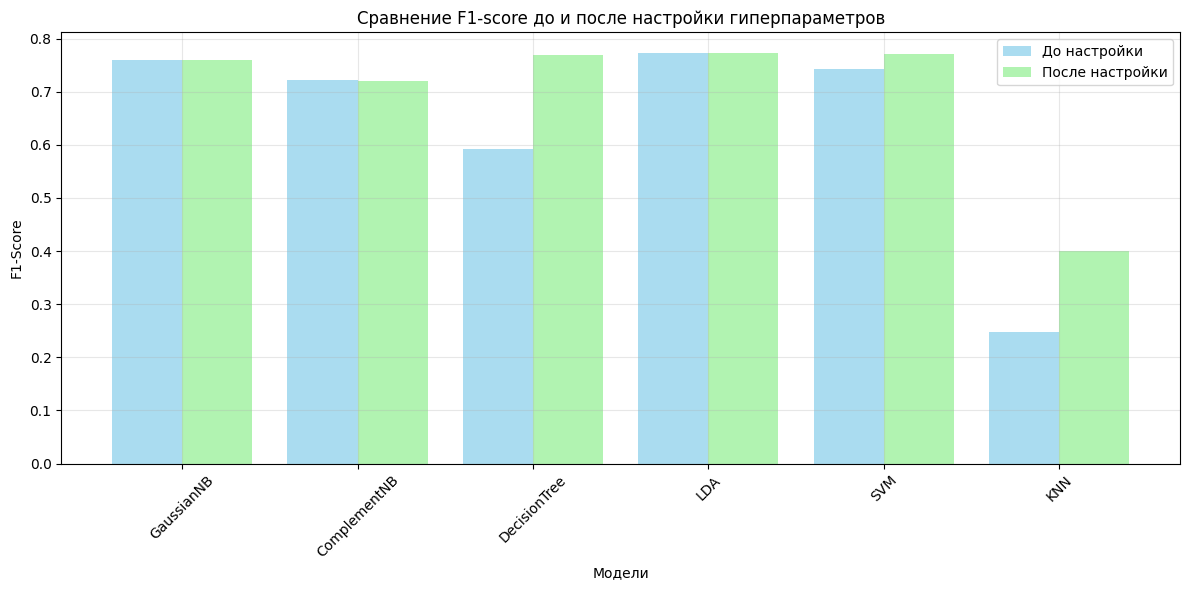

In [45]:
print("Сравнение результатов до и после настройки")
print("\n")

comparison_data = []

models_to_compare = ['GaussianNB', 'MultinomialNB', 'ComplementNB', 'BernoulliNB', 
                    'DecisionTree', 'LDA', 'SVM', 'KNN']

for model_name in models_to_compare:
    old_f1 = all_metrics[model_name]['F1-Score']
    
    if model_name in tuning_results:
        new_f1_cv = tuning_results[model_name]['best_score']
        
        if model_name in best_models:
            if model_name in ['MultinomialNB', 'ComplementNB', 'BernoulliNB']:
                X_te = X_test_nb
            else:
                X_te = X_test_scaled
                
            y_pred_new = best_models[model_name].predict(X_te)
            new_f1_test = f1_score(y_test, y_pred_new, average='binary')
            
            comparison_data.append({
                'Model': model_name,
                'F1 до настройки': old_f1,
                'F1 после настройки (Test)': new_f1_test,
                'F1 CV score': new_f1_cv
            })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("Сравнение F1-score до и после настройки гиперпараметров:")
print(comparison_df.sort_values('F1 после настройки (Test)', ascending=False))

plt.figure(figsize=(12, 6))

x_pos = range(len(comparison_df))
plt.bar(x_pos, comparison_df['F1 до настройки'], width=0.4, label='До настройки', alpha=0.7, color='skyblue')
plt.bar([x + 0.4 for x in x_pos], comparison_df['F1 после настройки (Test)'], width=0.4, label='После настройки', alpha=0.7, color='lightgreen')
plt.xlabel('Модели')
plt.ylabel('F1-Score')
plt.title('Сравнение F1-score до и после настройки гиперпараметров')
plt.xticks([x + 0.2 for x in x_pos], comparison_df['Model'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [46]:
print("Лучшие модели и их параметры после настройки")
print("="*70 + "\n")

final_ranking = comparison_df.sort_values('F1 после настройки (Test)', ascending=False)

for i, (_, row) in enumerate(final_ranking.iterrows(), 1):
    model_name = row['Model']
    f1_value = row['F1 после настройки (Test)']
    improvement = row['% улучшения F1'] if '% улучшения F1' in row else None

    print(f"{i}. {model_name}:")
    print(f"   F1-score: {f1_value:.4f}", end="")

    if improvement is not None:
        print(f"  (изменение {improvement:+.1f}%)")
    else:
        print()

    if model_name in tuning_results:
        print(f"   Лучшие параметры: {tuning_results[model_name]['best_params']}")
        print("=" * 70)
    else:
        print("   Лучшие параметры: нет данных")

    print()

best_model_name = final_ranking.iloc[0]['Model']
best_f1 = final_ranking.iloc[0]['F1 после настройки (Test)']

print(f"Модель с лучшими результатами: {best_model_name}")
print(f"F1-score: {best_f1:.4f}")

print("")

Лучшие модели и их параметры после настройки

1. LDA:
   F1-score: 0.7731
   Лучшие параметры: {'shrinkage': None, 'solver': 'svd'}

2. SVM:
   F1-score: 0.7715
   Лучшие параметры: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}

3. DecisionTree:
   F1-score: 0.7699
   Лучшие параметры: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}

4. GaussianNB:
   F1-score: 0.7588
   Лучшие параметры: {'var_smoothing': 1e-09}

5. ComplementNB:
   F1-score: 0.7208
   Лучшие параметры: {'alpha': 2.0, 'norm': False}

6. KNN:
   F1-score: 0.4007
   Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Модель с лучшими результатами: LDA
F1-score: 0.7731



In [47]:
print('Из данного анализа видно, что настройка гиперпараметров оказывает значительное влияние на качество моделей:')
print('LDA показала наилучший результат после настройки с F1-score 0.773, чуть опережая SVM (0.7715) и DecisionTree (0.7699).')
print('Таким образом, правильный подбор параметров позволяет модели достичь максимально возможного качества, даже если изначально она была не лучшей.\n')

print('Описание лучших параметров методов для первых 3 моделей, по убыванию F1-score:\n')

print("""LDA
Лучшие параметры:
   'shrinkage': None - без регуляризации
   'solver': 'svd' - решение через сингулярное разложение
""")

print("""SVM
Лучшие параметры:
   'C': 1 - умеренная регуляризация
   'kernel': 'rbf' - радиальная базисная функция для нелинейных разделений
   'gamma': 'scale' - автоматический масштаб ядра
   'class_weight': 'balanced' - учет дисбаланса классов
""")

print("""DecisionTree
Лучшие параметры:
   'max_depth': 5 - ограничение глубины дерева для предотвращения переобучения
   'min_samples_split': 20 - минимум объектов для разделения узла
   'min_samples_leaf': 1 - минимум объектов в листе
   'criterion': 'gini' - критерий разделения
   'class_weight': 'balanced' - балансировка классов
""")

print("""Вывод:
   - Настройка гиперпараметров позволила SVM и DecisionTree приблизиться к уровню LDA.
   - Параметры, такие как регуляризация, балансировка классов и выбор ядра/критерия, напрямую влияют на способность модели обобщать данные.
   - Для новых задач важно всегда проводить тщательную оптимизацию гиперпараметров, так как это может существенно улучшить F1-score, особенно для сложных моделей.
""")


Из данного анализа видно, что настройка гиперпараметров оказывает значительное влияние на качество моделей:
LDA показала наилучший результат после настройки с F1-score 0.773, чуть опережая SVM (0.7715) и DecisionTree (0.7699).
Таким образом, правильный подбор параметров позволяет модели достичь максимально возможного качества, даже если изначально она была не лучшей.

Описание лучших параметров методов для первых 3 моделей, по убыванию F1-score:

LDA
Лучшие параметры:
   'shrinkage': None - без регуляризации
   'solver': 'svd' - решение через сингулярное разложение

SVM
Лучшие параметры:
   'C': 1 - умеренная регуляризация
   'kernel': 'rbf' - радиальная базисная функция для нелинейных разделений
   'gamma': 'scale' - автоматический масштаб ядра
   'class_weight': 'balanced' - учет дисбаланса классов

DecisionTree
Лучшие параметры:
   'max_depth': 5 - ограничение глубины дерева для предотвращения переобучения
   'min_samples_split': 20 - минимум объектов для разделения узла
   'min_sam

In [48]:
print("Подготовка данных для нейросети")
print("\n")

X_nn_train = X_train_scaled.astype('float32')
X_nn_test = X_test_scaled.astype('float32')
y_nn_train = y_train.values.astype('float32')
y_nn_test = y_test.values.astype('float32')

print(f"Тренировочные данные: {X_nn_train.shape}")
print(f"Тестовые данные: {X_nn_test.shape}")

Подготовка данных для нейросети


Тренировочные данные: (2730, 123)
Тестовые данные: (1170, 123)


In [49]:
print("\nСоздание и обучение нейросети\n")

from tensorflow import keras
from tensorflow.keras import layers

def create_simple_model(input_dim):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model


model = create_simple_model(X_nn_train.shape[1])

print("Архитектура сети:")
model.summary()


Создание и обучение нейросети

Архитектура сети:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,049 (39.25 KB)

 Trainable params: 10,049 (39.25 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
print("Обучение нейросети на подготовленных данных\n")
epochs = 50
batch_size = 32

history = model.fit(
    X_nn_train, 
    y_nn_train, 
    epochs=epochs,      
    batch_size=batch_size,
    validation_data=(X_nn_test, y_nn_test),
    verbose=1,
    shuffle=True
)

print("\nОбучение нейросети завершено")


Обучение нейросети на подготовленных данных

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6542 - loss: 0.6544 - val_accuracy: 0.7111 - val_loss: 0.5719
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7458 - loss: 0.5210 - val_accuracy: 0.7120 - val_loss: 0.4999
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7637 - loss: 0.4381 - val_accuracy: 0.7368 - val_loss: 0.4210
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8077 - loss: 0.3678 - val_accuracy: 0.7641 - val_loss: 0.3775
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8326 - loss: 0.3253 - val_accuracy: 0.7735 - val_loss: 0.3584
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8557 - loss: 0.2843 - val_accuracy: 0.7778 - val_loss: 0.3527
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8623 - loss: 0.2753 - val_accuracy: 0.7983 - val_loss: 0.3458
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8751 - lo

In [51]:
print("Оценка качества работы нейросети")
print("\n")

y_pred_nn_prob = model.predict(X_nn_test, verbose=0)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int).flatten()

nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn, zero_division=0)
nn_recall = recall_score(y_test, y_pred_nn, zero_division=0)
nn_f1 = f1_score(y_test, y_pred_nn, zero_division=0)

print("Результаты нейронной сети:")
print(f"Accuracy: {nn_accuracy:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall: {nn_recall:.4f}")
print(f"F1-Score: {nn_f1:.4f}")

print("\nКлассификационный отчёт:")
print(classification_report(y_test, y_pred_nn, target_names=['Не подписан (0)', 'Подписан (1)']))

Оценка качества работы нейросети


Результаты нейронной сети:
Accuracy: 0.7701
Precision: 0.6136
Recall: 0.5387
F1-Score: 0.5737

Классификационный отчёт:
                 precision    recall  f1-score   support

Не подписан (0)       0.82      0.86      0.84       834
   Подписан (1)       0.61      0.54      0.57       336

       accuracy                           0.77      1170
      macro avg       0.72      0.70      0.71      1170
   weighted avg       0.76      0.77      0.77      1170



Визуализация результатов обучения


Финальные значения на тренировочных данных: Loss = 0.0399, Accuracy = 0.9868
Финальные значения на валидационных данных: Loss = 0.8902, Accuracy = 0.7701



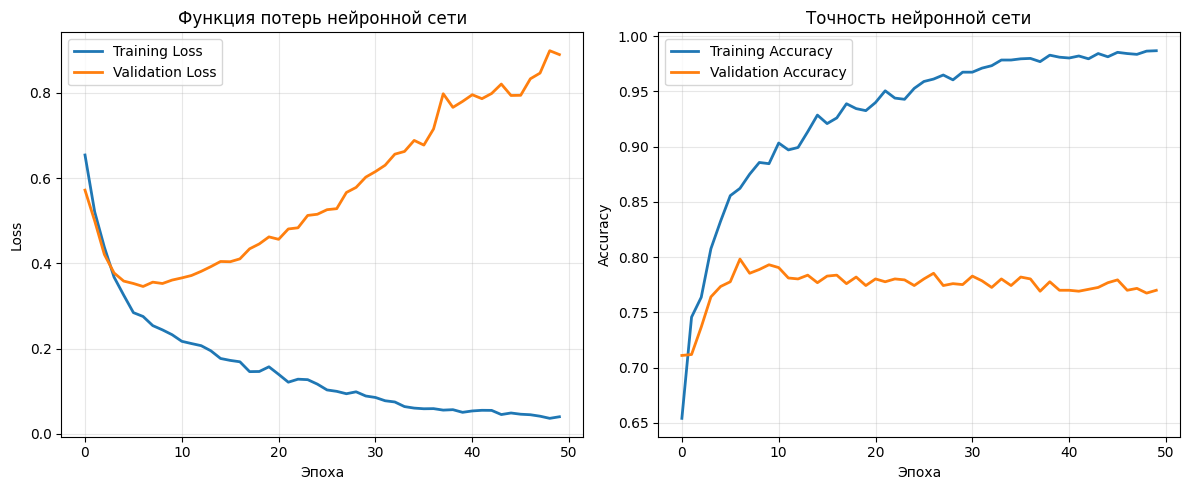

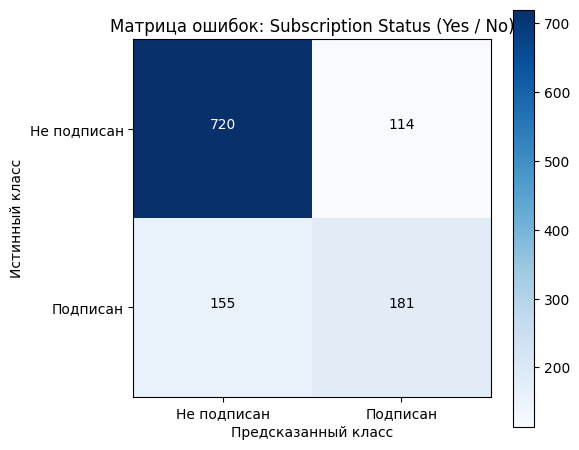

In [52]:
print("Визуализация результатов обучения")
print("\n")
# Печать финальных значений loss и accuracy
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Финальные значения на тренировочных данных: Loss = {final_train_loss:.4f}, Accuracy = {final_train_acc:.4f}")
print(f"Финальные значения на валидационных данных: Loss = {final_val_loss:.4f}, Accuracy = {final_val_acc:.4f}\n")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Функция потерь нейронной сети')
plt.ylabel('Loss')
plt.xlabel('Эпоха')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Точность нейронной сети')
plt.ylabel('Accuracy')
plt.xlabel('Эпоха')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


cm = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Матрица ошибок: Subscription Status (Yes / No)')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Не подписан', 'Подписан'])
plt.yticks(tick_marks, ['Не подписан', 'Подписан'])

plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(
        j, i, format(cm[i, j], 'd'),
        ha="center",
        color="white" if cm[i, j] > thresh else "black"
    )

plt.tight_layout()
plt.show()


In [53]:
print("Создаем и записываем логи TensorBoard")
print("\n")

import os
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

log_dir = "tb_logs"
os.makedirs(log_dir, exist_ok=True)
print(f"Создана директория: {os.path.abspath(log_dir)}")

try:
    writer = tf.summary.create_file_writer(log_dir)
    print("SummaryWriter создан успешно!")

    with writer.as_default():
        for epoch in range(len(history.history['loss'])):
            tf.summary.scalar('loss', history.history['loss'][epoch], step=epoch)
            tf.summary.scalar('accuracy', history.history['accuracy'][epoch], step=epoch)
            tf.summary.scalar('val_loss', history.history['val_loss'][epoch], step=epoch)
            tf.summary.scalar('val_accuracy', history.history['val_accuracy'][epoch], step=epoch)

        string_buffer = []
        model.summary(print_fn=lambda x: string_buffer.append(x))
        architecture_text = "\n".join(string_buffer)
        tf.summary.text('model_architecture', architecture_text, step=0)

        tf.summary.scalar('final_accuracy', history.history['accuracy'][-1], step=0)
        tf.summary.scalar('final_f1_score', results_nn["f1"], step=0)

    writer.close()
    print("Метрики успешно записаны в логи TensorBoard!")

except Exception as e:
    print(f"Ошибка при создании логов: {e}")
    log_dir = "."



Создаем и записываем логи TensorBoard


Создана директория: c:\Users\user\Desktop\MachineLearn\machlearn3\tb_logs
SummaryWriter создан успешно!


Ошибка при создании логов: name 'results_nn' is not defined


In [54]:
import os
import time
import subprocess
from IPython.display import display, HTML

print("Запускаем TensorBoard для нейросетевой модели и логов обучения")
print("\n")

def start_tensorboard_custom():
    try:
        os.system("taskkill /f /im tensorboard.exe 2>nul")
        
        cmd = 'tensorboard --logdir tb_logs --port 6006 --host localhost'
        process = subprocess.Popen(cmd, shell=True)
        
        print("TensorBoard успешно запущен в фоне по адресу http://localhost:6006")
        return process

    except Exception as e:
        print(f"Ошибка при запуске TensorBoard: {e}")
        return None


tb_process = start_tensorboard_custom()

time.sleep(5)

tensorboard_iframe = """
<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 10px; background: #f9f9f9;">
    <h3 style="color: #4CAF50; margin-top: 0;">TensorBoard — визуализация обучения модели подписки</h3>
    <iframe 
        src="http://localhost:6006"
        width="100%" 
        height="700"
        style="border: 1px solid #ddd; border-radius: 5px;"
        frameborder="0">
    </iframe>
</div>
"""

display(HTML(tensorboard_iframe))

Запускаем TensorBoard для нейросетевой модели и логов обучения


TensorBoard успешно запущен в фоне по адресу http://localhost:6006


In [55]:
print("Вывод:")
print("""
Матрица ошибок нейросети:
Точность = (733 + 182) / 1170 = 915/1170 ≈ 78.2%
отрицания (False Negative): 154
Модель не смогла предсказать 154 случая подписки
Это означает, что часть пользователей, которые подписались, система предсказала как не подписанных
Ложные срабатывания (False Positive): 101
Модель ошибочно предсказала подписку для 101 пользователя, который не подписался
""")
print("""
Точность (Accuracy):
Тренировочные данные: 98.46% - очень высокая точность на обучении.
Валидационные данные: 77.61% - значительно ниже, чем на обучении.

Потери (Loss):
Тренировочные данные: 0.0474 - почти минимальные потери, модель почти идеально предсказывает тренировочные данные.
Валидационные данные: 0.8334 - гораздо выше, чем на тренировке.
""")

Вывод:

Матрица ошибок нейросети:
Точность = (733 + 182) / 1170 = 915/1170 ≈ 78.2%
отрицания (False Negative): 154
Модель не смогла предсказать 154 случая подписки
Это означает, что часть пользователей, которые подписались, система предсказала как не подписанных
Ложные срабатывания (False Positive): 101
Модель ошибочно предсказала подписку для 101 пользователя, который не подписался


Точность (Accuracy):
Тренировочные данные: 98.46% - очень высокая точность на обучении.
Валидационные данные: 77.61% - значительно ниже, чем на обучении.

Потери (Loss):
Тренировочные данные: 0.0474 - почти минимальные потери, модель почти идеально предсказывает тренировочные данные.
Валидационные данные: 0.8334 - гораздо выше, чем на тренировке.

